For this we will analysis the ball position!
- When it was hit 
- In which direction

We will use the X and Y coordinate of the ball_detection to do so!!

In [2]:
import pickle # pickle to read from the stubs!! 
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# read the pickle file
with open('../tracker_stubs/ball_detections.pkl', 'rb') as f:
    ball_positions = pickle.load(f)

In [4]:
ball_positions = [x.get(1,[]) for x in ball_positions]
# convert the list into pandas dataframe
df_ball_positions = pd.DataFrame(ball_positions,columns=['x1','y1','x2','y2'])

# interpolate the missing values
df_ball_positions = df_ball_positions.interpolate()
df_ball_positions = df_ball_positions.bfill()

In [6]:
df_ball_positions.head

# These are all the ball positions XYmin XY max

<bound method NDFrame.head of               x1          y1           x2          y2
0     892.196960  616.946167   911.291931  639.511963
1     892.196960  616.946167   911.291931  639.511963
2     877.746838  630.612488   896.837012  652.946167
3     863.296716  644.278809   882.382092  666.380371
4     848.846594  657.945129   867.927173  679.814575
..           ...         ...          ...         ...
209  1184.961670  247.833710  1200.742065  265.953552
210  1184.388428  233.064804  1196.795166  246.147049
211  1183.320923  226.672714  1196.945190  241.709244
212  1179.956909  213.683853  1195.603760  230.370346
213  1179.116089  204.463898  1194.581177  220.501465

[214 rows x 4 columns]>

# How do we know when was the ball hit back?
- We can make use of rolling mean with a window of 5
- Rolling means is to get the mean of 5 numbers in a slinding window!
- when you plot the graph it the peak will tell you that the ball changed direction!

In [7]:
df_ball_positions['mid_y'] = (df_ball_positions['y1'] + df_ball_positions['y2'])/2
df_ball_positions['mid_y_rolling_mean'] = df_ball_positions['mid_y'].rolling(window=5, min_periods=1, center=False).mean()

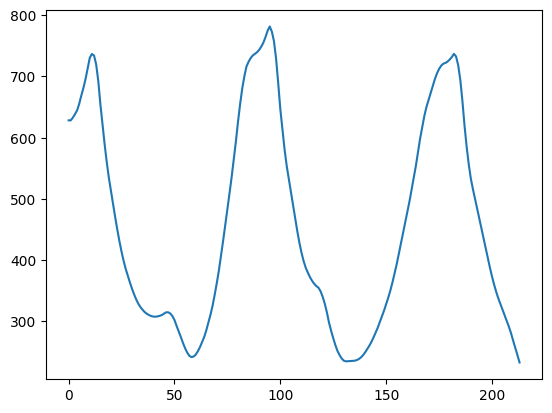

In [8]:

# plot mid_y_rolling_mean
plt.plot(df_ball_positions['mid_y_rolling_mean'])

- Another visualisation is to get the diff() of the rolling mean
- Which is the difference between consectuive elements!!

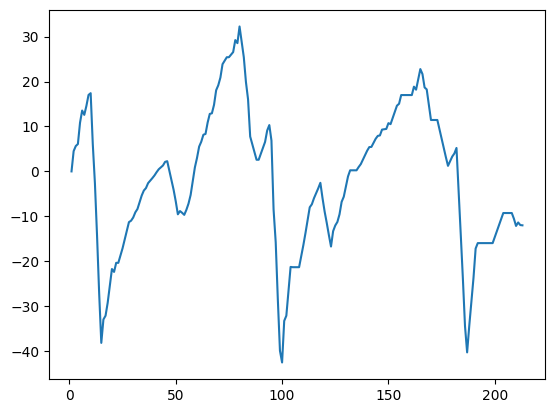

In [9]:
df_ball_positions['delta_y'] = df_ball_positions['mid_y_rolling_mean'].diff()
# plot mid_y_rolling_mean
plt.plot(df_ball_positions['delta_y'])


In [19]:

minimum_change_frames_for_hit = 25
# There is a min because we cannot get all the frames as this 24fps!

df_ball_positions['ball_hit'] = 0
for i in range(1,len(df_ball_positions)- int(minimum_change_frames_for_hit*1.2) ):
    negative_position_change = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[i+1] <0
    positive_position_change = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[i+1] >0

    if negative_position_change or positive_position_change:
        change_count = 0 
        # Plus 1 which is account for the next frame!
        for change_frame in range(i+1, i+int(minimum_change_frames_for_hit*1.2)+1):
            negative_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] >0 and df_ball_positions['delta_y'].iloc[change_frame] <0
            positive_position_change_following_frame = df_ball_positions['delta_y'].iloc[i] <0 and df_ball_positions['delta_y'].iloc[change_frame] >0

            if negative_position_change and negative_position_change_following_frame:
                change_count+=1
            elif positive_position_change and positive_position_change_following_frame:
                change_count+=1
    
        if change_count>minimum_change_frames_for_hit-1:
            df_ball_positions['ball_hit'].iloc[i] = 1


# Get a list of the indexes when the ball was hit!
frame_nums_with_ball_hits = df_ball_positions[df_ball_positions['ball_hit']==1].index.tolist()
# index_list  = [df_ball_positions[df_ball_positions["ball_hit"]==1].index]



C:\Users\leeju\AppData\Local\Temp\ipykernel_9944\2694042646.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ball_positions['ball_hit'].iloc[i] = 1


In [25]:
index_list  = [df_ball_positions[df_ball_positions["ball_hit"]==1].index]
index_list

# These are the positions when it was hit
# You can also double check!

[Int64Index([11, 58, 95, 131, 182], dtype='int64')]